In [54]:
import pandas as pd

In [55]:
song_df = pd.DataFrame()

song_df["Genre"]=["pop","rap","rap","pop","rock","r&b","pop","r&b","rap","r&b","pop","rock","rock"]

song_df["Format"] = ["single","ep","ep","single","album","single","album","album","ep","single","album","ep","single"]

song_df["Celebrity list"]= ["A","C","D","C","D","A","B","C","A","D","A","A","B"]

song_df["Hit"] = ["yes","yes","no","yes","no","no","yes","yes","yes",
                  "no","yes","yes","no"]

In [56]:
print(song_df)

   Genre  Format Celebrity list  Hit
0    pop  single              A  yes
1    rap      ep              C  yes
2    rap      ep              D   no
3    pop  single              C  yes
4   rock   album              D   no
5    r&b  single              A   no
6    pop   album              B  yes
7    r&b   album              C  yes
8    rap      ep              A  yes
9    r&b  single              D   no
10   pop   album              A  yes
11  rock      ep              A  yes
12  rock  single              B   no


In [57]:
one_hot_data = pd.get_dummies(song_df[["Genre","Format","Celebrity list"]])

In [58]:
print(one_hot_data)

    Genre_pop  Genre_r&b  Genre_rap  Genre_rock  Format_album  Format_ep  \
0           1          0          0           0             0          0   
1           0          0          1           0             0          1   
2           0          0          1           0             0          1   
3           1          0          0           0             0          0   
4           0          0          0           1             1          0   
5           0          1          0           0             0          0   
6           1          0          0           0             1          0   
7           0          1          0           0             1          0   
8           0          0          1           0             0          1   
9           0          1          0           0             0          0   
10          1          0          0           0             1          0   
11          0          0          0           1             0          1   
12          

In [59]:
from sklearn import tree

In [60]:
clf = tree.DecisionTreeClassifier(criterion= "gini")

In [61]:
clf_train = clf.fit(one_hot_data, song_df["Hit"])

digraph Tree {
node [shape=box] ;
0 [label="X[10] <= 0.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]"] ;
1 [label="X[6] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 6\nvalue = [0, 6]"] ;
1 -> 2 ;
3 [label="X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


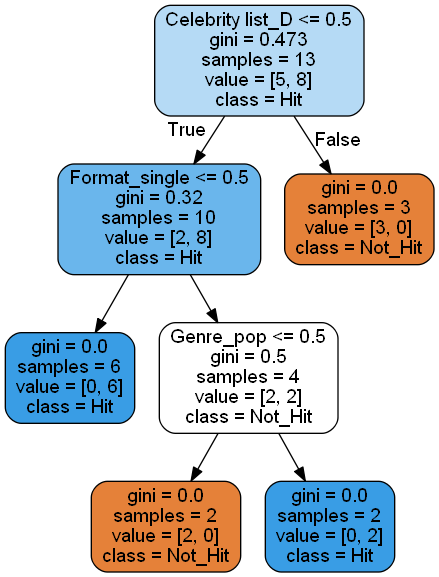

In [62]:
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Hit', 'Hit'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [63]:
#test (genre = rap, format = ep, celebrity list = b)
prediction = clf_train.predict([[0,0,1,0,0,1,0,0,1,0,0]])
print(prediction)

['yes']


In [64]:
#test (genre = pop, format = album, celebrity list = a)
prediction = clf_train.predict([[1,0,0,0,1,0,0,1,0,0,0]])
print(prediction)

['yes']


In [65]:
#test (genre = rock, format = ep, celebrity list = d)
prediction = clf_train.predict([[0,0,0,1,0,1,0,0,0,0,1]])
print(prediction)

['no']


In [66]:
#test (genre = rock, format = ep, celebrity list = d)
prediction = clf_train.predict([[0,0,1,0,1,0,0,0,0,1,0]])
print(prediction)

['yes']
